# Project Outline

The structure of the discussion and content aggregation website Reddit provides
an opportunity to study communities in a quantitative way, abstracted from the
particulars of discussions within each community. By examining the upvotes and
downvotes associated with the posts in a subreddit, one can estimate the degree
of consensus or controversy within a community. With additional information in
the form of votes by particular users, one can likewise describe the users of a
particular subreddit in numerical terms.

Questions of interest include the following:

- How popular or controversial is a given post?
- How likely are users within a community to vote according to the consensus?
- Are upvotes or downvotes more common within a subreddit, and to what degree?
- How positive or negative is a particular user's voting patterns? Do these
  patterns vary by subreddit?

The goal of this project is to answer such questions and thereby construct
profiles of communities within Reddit.

## About the Data

This data was downloaded from a 
[publicly available dataset](https://www.kaggle.com/josephleake/huge-collection-of-reddit-votes/) 
originally gathered and published by Joseph Leake. It consists of two files: 
submission_info.txt and submission_info.txt and 44_million_votes.txt. Both are 
tab-separated data files. The rows of the first file correspond to votes, and the
columns consist of submission ID, the subreddit where the submission was posted,
the time at which the vote was made, the username of the person who voted, and
whether the vote was positive or negative. The rows of the second file correspond
to the submissions being voted on, with columns for the submission ID, the subreddit
where the submission was posted, the submission title, the submission author,
the number of comments under the submission, whether the submission is marked as
NSFW (not safe for work), the submission's overall score, the percentage of
upvotes, and the submission URL.


In [ ]:
# Use the data files to generate a CSV whose rows are the unique subreddits in the 
# dataset, with columns for the number of votes and submissions in each subreddit.

import csv

# The subreddits dict will contain the unique subreddits as keys. Values are to be 
# lists, with the number of submissions as the first entry and the number of votes as 
# the second entry.
subreddits = {}

# Read submission_info.txt to populate the subreddits dict and count the submissions
# by subreddit.
with open('./data/submission_info.txt', encoding="utf8", newline='') as submissions:
    reader = csv.DictReader(submissions, delimiter='\t')
    for row in reader:
        if row['SUBREDDIT'] not in subreddits: subreddits[row['SUBREDDIT']] = [1,0]
        else: subreddits[row['SUBREDDIT']][0] += 1
        
# Count the number of votes per subreddit.
with open('./data/44_million_votes.txt', encoding="utf8", newline='') as votes:
    reader = csv.DictReader(votes, delimiter='\t')
    for row in reader:
        subreddit_name = row['SUBREDDIT'][2:]
        if subreddit_name not in subreddits: subreddits[subreddit_name] = [0,1]
        else: subreddits[subreddit_name][1] += 1

# Use the subreddits dict to create a list of tuples.
subreddits_list = []
for subreddit in subreddits:
    subreddits_list.append((subreddit, subreddits[subreddit][0], 
                           subreddits[subreddit][1]))

# The list is sorted first by the number of votes (descending), then by the number of 
# submissions (descending), and finally alphabetically by subreddit name (ascending).
subreddits_list.sort(key=lambda subreddit: (-subreddit[2],-subreddit[1],subreddit[0]))

# Write the CSV file with the desired information.
with open('./data/subreddits.csv', 'w') as file:
    file.write('SUBREDDITS,SUBMISSIONS,VOTES')
    for subreddit in subreddits_list:
        line = (subreddit[0], str(subreddit[1]), str(subreddit[2]))
        file.write('\n' + ','.join(line))

In [1]:
# Obtain the labels and data required for a bar graph of the top five subreddits.

import csv
# import matplotlib

subreddit_labels = []
submissions = []
votes = []

with open('./data/subreddits.csv', newline = '') as subreddits:
    r = 0
    reader = csv.DictReader(subreddits)
    for row in reader:
        subreddit_labels.append(row['SUBREDDITS'])
        submissions.append(int(row['SUBMISSIONS']))
        votes.append(int(row['VOTES']))
        r += 1
        if r == 5: break
 

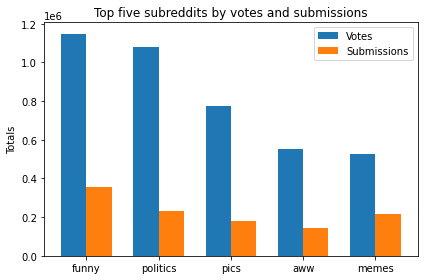

In [3]:
# Generate a bar graph of the top five subreddits.

bar_width = 0.35

import matplotlib
import matplotlib.pyplot as pyplot
import numpy

x = numpy.arange(len(subreddit_labels))

bar_graph, axes = pyplot.subplots()
vote_rectangles = axes.bar(x - bar_width/2, votes, bar_width, label='Votes')
submission_rectangles = axes.bar(x + bar_width/2, submissions, bar_width, label='Submissions')

axes.set_ylabel('Totals')
axes.set_title('Top five subreddits by votes and submissions')
axes.set_xticks(x)
axes.set_xticklabels(subreddit_labels)
axes.legend()

bar_graph.tight_layout()